In [1]:
import os
import rawpy
import numpy as np
import math
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

## GAMMA ANALYSIS

In [2]:
file = open('./dataset/Sony_train_list.txt').read()
pairs = file.split('\n')
np.random.shuffle(pairs)
pairs = pairs[:200]
inp = list()
out = list()
for pair in pairs:
    i = pair.split()[0]
    o = pair.split()[1]
    inp.append(i)
    out.append(o)

In [3]:
inp_images = []
out_images= []
os.chdir('./dataset')
count = 1
for i, o in zip(inp, out):
    print(count)
    image_i = rawpy.imread(i).postprocess(use_camera_wb=True)
    imgage_i = cv2.cvtColor(image_i, cv2.COLOR_RGB2BGR)
    image_o = rawpy.imread(o).postprocess(use_camera_wb=True)
    image_o = cv2.cvtColor(image_o, cv2.COLOR_RGB2BGR)
    inp_images.append(image_i)
    out_images.append(image_o)
    count+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [4]:
gammas = []
count=1
for i, o in zip(inp_images, out_images):
    print(count)
    count+=1
    ai = np.average(i, axis=None)
    ao = np.average(o, axis=None)
    gamma = math.log(ao, ai) 
    gammas.append(gamma)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


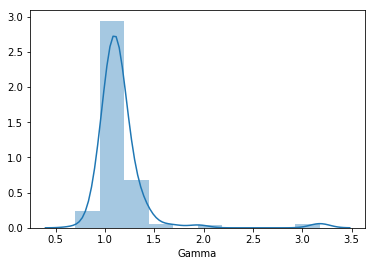

In [6]:
sns.distplot(gammas, bins=10)
plt.xlabel('Gamma')
plt.savefig('./gamma_dist.png')

In [ ]:
test_i = inp_images[0].flatten()
test_o = out_images[0].flatten()
test_o_g = np.power(out_images[0], gammas[0]).flatten()

In [ ]:
test_i.shape

In [ ]:
sns.distplot(test_i, bins=10, label='dark')
sns.distplot(test_o, bins=10, label='bright')
sns.distplot(test_o_g, bins=10, label='bright+gamma')
plt.legend()
plt.show()

## White Balance

In [7]:
channel1 = []
channel2 = []
channel3 = []
chosen = []
count=1
for i, o, g in zip(inp_images, out_images, gammas):
    print(count)
    count+=1
    avg = np.divide(i, np.power(o, g), out=np.zeros_like(i, dtype=np.float32), where=np.power(o,g)!=0)
    c1 = np.average(avg[:, :, 0])
    c2 = np.average(avg[:, :, 1])
    c3 = np.average(avg[:, :, 2])
    
    channel1.append(c1)
    channel2.append(c2)
    channel3.append(c3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


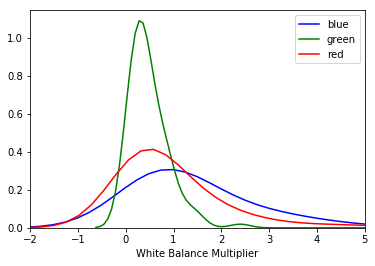

In [33]:
sns.distplot([val for val in channel1], bins=10, color='blue', label='blue', hist=False)
sns.distplot([val for val in channel2], bins=10, color='green', label='green', hist=False)
sns.distplot([val for val in channel3], bins=10, color='red', label='red', hist=False)
plt.xlabel('White Balance Multiplier')
plt.xlim(-2,5)
plt.legend()
plt.savefig('./wb_plot.png')

In [16]:
np.mean(gammas)

1.1576635830858957

In [17]:
np.std(gammas)

0.29100618938825307

In [18]:
np.mean(channel1)

1.7918024

In [19]:
np.std(channel1)

2.4467483

In [20]:
np.mean(channel2)

0.5118653

In [21]:
np.std(channel2)

0.59991634

In [22]:
np.mean(channel3)

1.0857291

In [23]:
np.std(channel3)

1.9374926

## Black Level

In [34]:
bls = []
for i, o, g, c1, c2, c3 in zip(inp_images, out_images, gammas, channel1, channel2, channel3):
    temp = o
    gimg = np.power(temp, g)
    temp[:, :, 0] = temp[:, :, 0]*(1/c1)
    temp[:, :, 1] = temp[:, :, 0]*(1/c2)
    temp[:, :, 2] = temp[:, :, 0]*(1/c3)
    sub = np.subtract(temp, i)
    bls.append(np.average(sub))

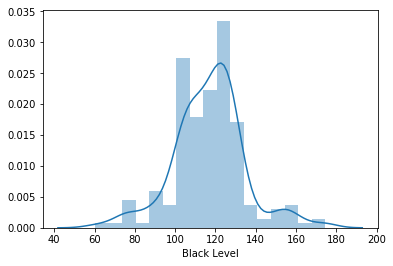

In [37]:
sns.distplot(bls)
plt.xlabel('Black Level')
plt.savefig('blacklevel_plt.png')

In [36]:
np.mean(bls)

116.97572809030565